In [1]:
pip install numpy pandas scikit-learn matplotlib

Note: you may need to restart the kernel to use updated packages.


In [106]:
# importar bibliotecas
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import re
from sklearn.metrics import mean_squared_error,r2_score, classification_report



### 1. Realizar un análisis exploratorio de los datos
Cargar y examinar el conjunto de datos, y revisar valores faltantes y estadísticas descriptivas.

In [15]:
BD = pd.read_csv('./car details v4.csv') # Se carga la base segun como la haya guardado 
BD.head(5)

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [13]:
# Observamos los estadisticos descriptivos de la base de datos
BD.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [19]:
# Resumen estadístico
print(BD.describe())

              Price         Year     Kilometer       Length        Width  \
count  2.059000e+03  2059.000000  2.059000e+03  1995.000000  1995.000000   
mean   1.702992e+06  2016.425449  5.422471e+04  4280.860652  1767.991980   
std    2.419881e+06     3.363564  5.736172e+04   442.458507   135.265825   
min    4.900000e+04  1988.000000  0.000000e+00  3099.000000  1475.000000   
25%    4.849990e+05  2014.000000  2.900000e+04  3985.000000  1695.000000   
50%    8.250000e+05  2017.000000  5.000000e+04  4370.000000  1770.000000   
75%    1.925000e+06  2019.000000  7.200000e+04  4629.000000  1831.500000   
max    3.500000e+07  2022.000000  2.000000e+06  5569.000000  2220.000000   

            Height  Seating Capacity  Fuel Tank Capacity  
count  1995.000000       1995.000000         1946.000000  
mean   1591.735338          5.306266           52.002210  
std     136.073956          0.822170           15.110198  
min    1165.000000          2.000000           15.000000  
25%    1485.000000  

In [21]:
# Verificar valores faltantes
print(BD.isnull().sum())

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64


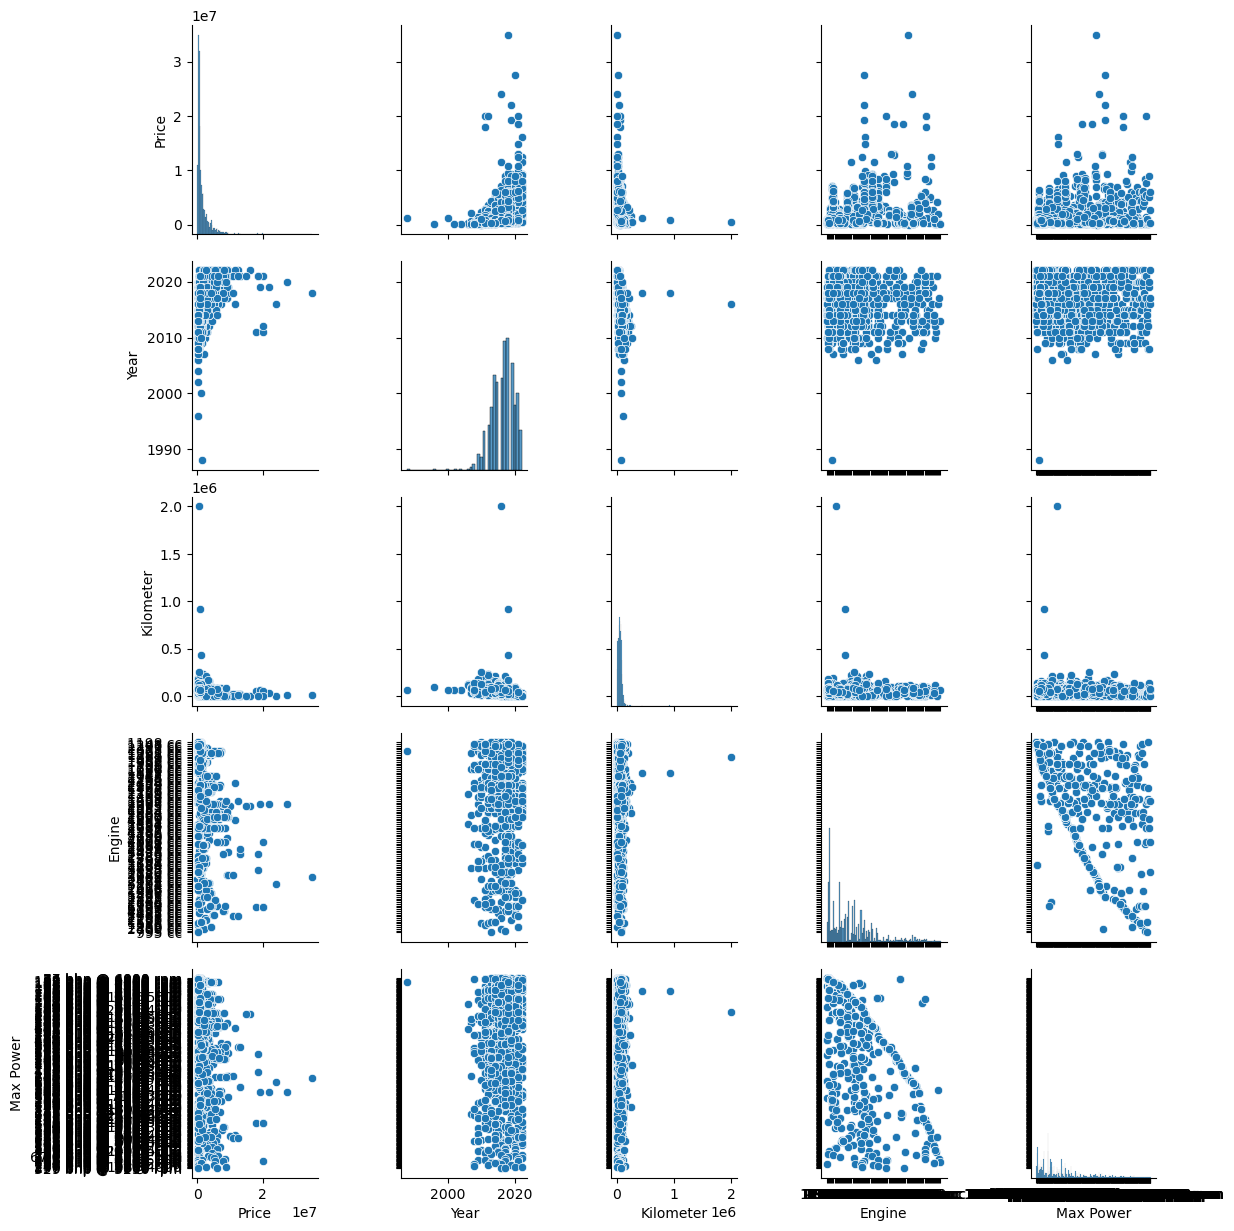

In [27]:
# Visualización de la distribución de algunas variables clave
sns.pairplot(BD, vars=["Price", "Year", "Kilometer", "Engine", "Max Power"])
plt.show()

### 2. Preprocesar los datos
Limpieza de datos: eliminación o imputación de valores faltantes y transformación de datos categóricos.

In [37]:
# Imputar valores faltantes (si es necesario) o eliminar filas con datos faltantes
BD = BD.dropna()  # Aquí estamos eliminando; también podrías imputar según el caso.
# Convertir variables categóricas en variables dummies
BD = pd.get_dummies(BD, columns=["Make", "Model", "Fuel Type", "Transmission", "Location", "Color", "Owner", "Seller Type"], drop_first=True)

print(BD.info())  # Revisar la estructura después de la conversión

<class 'pandas.core.frame.DataFrame'>
Index: 1874 entries, 0 to 2057
Columns: 1098 entries, Price to Seller Type_Individual
dtypes: bool(1086), float64(5), int64(3), object(4)
memory usage: 2.1+ MB
None


### 3. Seleccionar las características más relevantes
Usaremos correlaciones para identificar las características más relacionadas con el precio.

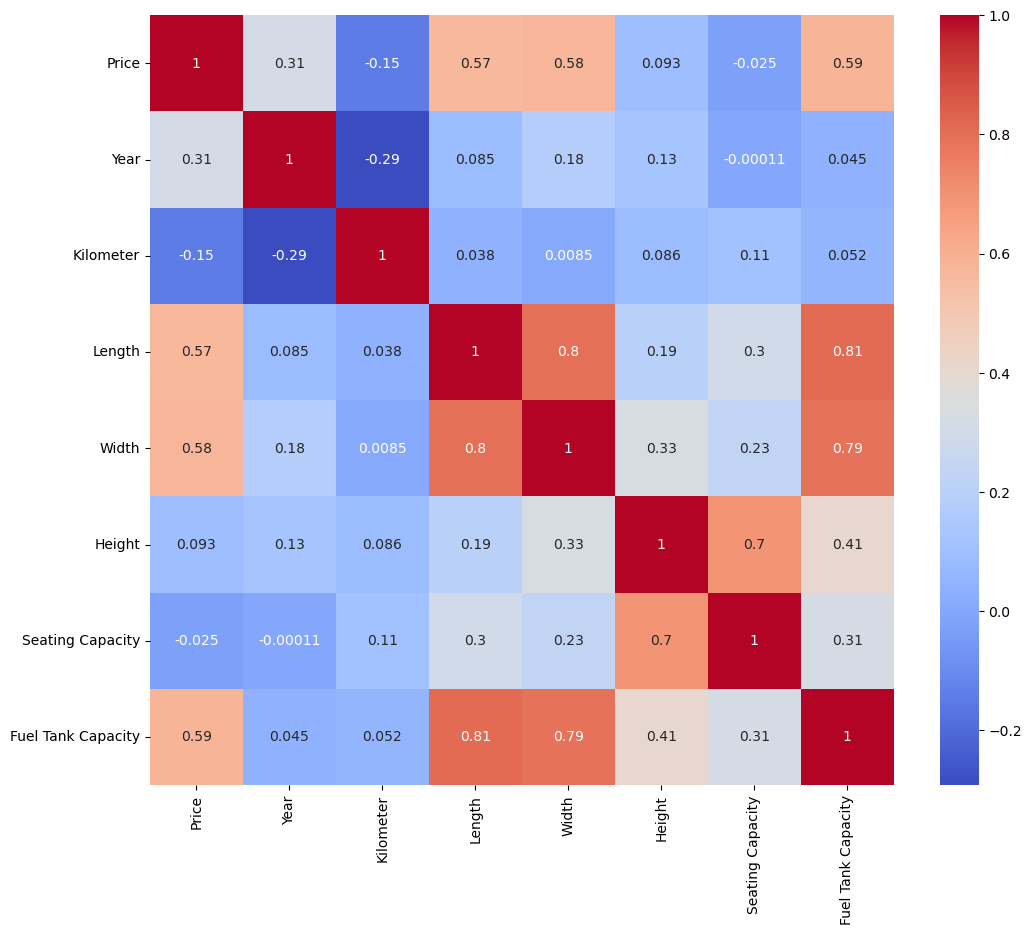

In [49]:
# Filtrar solo columnas numéricas para calcular la matriz de correlación
numeric_BD = BD.select_dtypes(include=[np.number])

# Calcular la correlación solo en datos numéricos
corr_matrix = numeric_BD.corr()

# Visualizar la matriz de correlación
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.show()

# Seleccionar las columnas que tienen alta correlación con "Price" y son numéricas
# Puedes ajustar "features" según los resultados de la correlación
features = ["Year", "Kilometer", "Engine", "Max Power", "Seating Capacity", "Fuel Tank Capacity"]
X=BD[features]
y=BD["Price"]


### 4. Dividir el dataset en Train y Test
Separar los datos en conjuntos de entrenamiento y prueba para validar el modelo.

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Imprimimos el conjunto de características de entrenamiento
print(X_train)

      Year  Kilometer  Seating Capacity  Fuel Tank Capacity
264   2009      39586               5.0                35.0
1326  2017      45000               5.0                35.0
1042  2018      17000               5.0                44.0
794   2020      18000               5.0                93.0
1997  2013      86000               5.0                42.0
...    ...        ...               ...                 ...
1244  2018      48000               5.0                35.0
1422  2017      52836               5.0                48.0
948   2018      45326               5.0                40.0
1601  2019      31056               5.0                48.0
1240  2016      55000               5.0                50.0

[1499 rows x 4 columns]


### 5. Entrenar el modelo configurando los hiperparámetros
Entrenar un modelo de Regresión Lineal y ajustar los hiperparámetros básicos

In [98]:
# Seleccionar solo las columnas numéricas relevantes y eliminar filas con valores faltantes
data_numeric = BD[["Year", "Kilometer", "Price", "Seating Capacity", "Fuel Tank Capacity"]].dropna()

# Definir las características (X) y la variable objetivo (y)
X = data_numeric.drop(columns="Price")
y = data_numeric["Price"]

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)
# Inicializar y entrenar el modelo de Regresión Lineal
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

# Evaluar el modelo
score = modelo_regresion.score(X_test, y_test)
print(f"Score del modelo: {score}")

# Imprimimos los valores de la variable dependiente de prueba
print("Valores reales de la variable dependiente en el conjunto de prueba:")
print(y_test)

Score del modelo: 0.5391349138677717
Valores reales de la variable dependiente en el conjunto de prueba:
1733     250000
275     4459000
1373     395000
88      1599000
1415    1260000
         ...   
1147     775000
1494     450000
1496    5200000
191      975000
1288     297000
Name: Price, Length: 375, dtype: int64


### 6. Evaluar el desempeño del modelo
Evaluar el rendimiento del modelo en el conjunto de prueba.

In [139]:
# Crear y ajustar el modelo de regresión lineal
modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo_regresion.predict(X_test)

# Definir las categorías
def categorize_price(price):
    if price < 20000:
        return 'Bajo'
    elif 20000 <= price < 50000:
        return 'Medio'
    else:
        return 'Alto'

# Convertir valores continuos en categorías
y_test_cat = y_test.apply(categorize_price)
y_pred_cat = pd.Series(y_pred).apply(categorize_price)

from sklearn.metrics import classification_report, accuracy_score

from sklearn.metrics import mean_squared_error, r2_score

# Evaluar el modelo utilizando métricas de regresión
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):",r2)


Mean Squared Error (MSE): 2547860333394.653
R-squared (R²): 0.5391349138677717


### 7. Realizar las diferentes gráficas para visualizar los resultados
Graficar los resultados y comparar los valores predichos con los valores reales

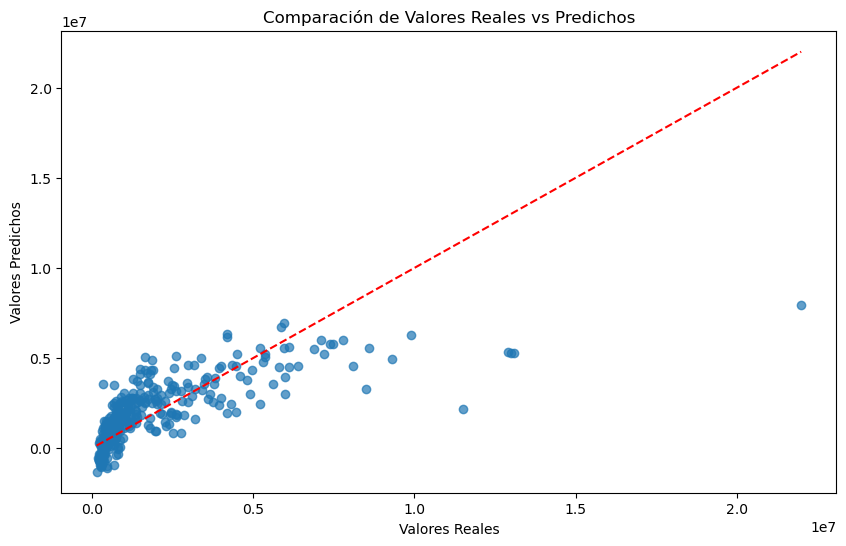

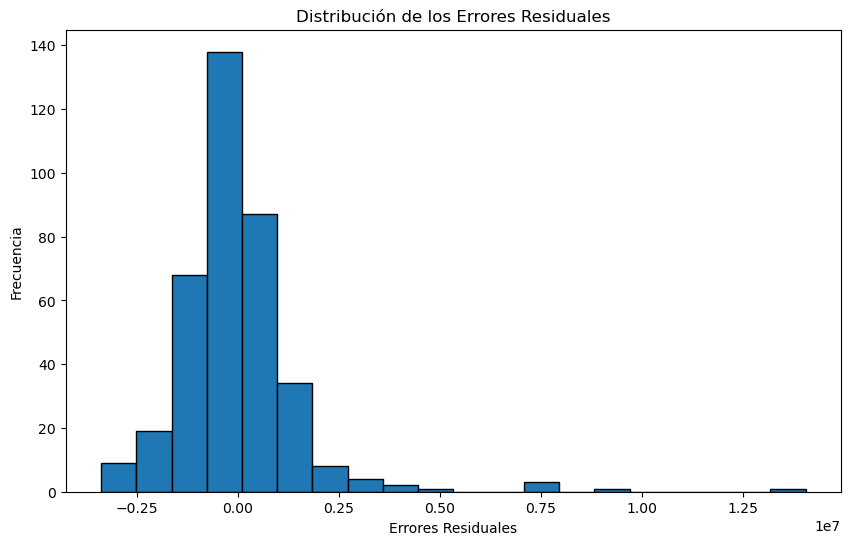

In [91]:
# Gráfico de dispersión para comparar las predicciones con los valores reales
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Valores Reales")
plt.ylabel("Valores Predichos")
plt.title("Comparación de Valores Reales vs Predichos")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

# Histograma de los errores residuales
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel("Errores Residuales")
plt.ylabel("Frecuencia")
plt.title("Distribución de los Errores Residuales")
plt.show()